# Prject Name: Demand Prediction (Busy Ratio Forecasting) of Doordash
# Method: CRISP-DM
# Author: A B M Ahsan

EDA:

In [1]:
# Import dataset

import pandas as pd
import numpy as np

df = pd.read_csv(r'G:\My Drive\DoorDash ML Model_Self Project\doordash.csv')

df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,promo_item,promo_order
0,1,2015-01-21 07:22:03-08:00,2015-01-21 08:17:43-08:00,dessert,2,1058,2,219,799,2.0,1.0,1.0,0,0
1,3,2015-01-21 07:31:51-08:00,2015-01-21 08:16:34-08:00,cafe,2,690,2,195,255,2.0,0.0,1.0,0,0
2,1,2015-01-21 07:39:16-08:00,2015-01-21 07:58:11-08:00,unknown,3,1867,3,449,529,4.0,1.0,1.0,0,0
3,1,2015-01-21 07:40:42-08:00,2015-01-21 08:22:37-08:00,cafe,3,955,3,245,345,3.0,2.0,2.0,0,0
4,1,2015-01-21 07:41:33-08:00,2015-01-21 08:35:14-08:00,chinese,3,825,1,125,125,0.0,0.0,0.0,0,0


In [2]:
df.shape

(197420, 14)

In [3]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'promo_item', 'promo_order'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197420 entries, 0 to 197419
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 197420 non-null  int64  
 1   created_at                197420 non-null  object 
 2   actual_delivery_time      197420 non-null  object 
 3   store_primary_category    197420 non-null  object 
 4   total_items               197420 non-null  int64  
 5   subtotal                  197420 non-null  int64  
 6   num_distinct_items        197420 non-null  int64  
 7   min_item_price            197420 non-null  int64  
 8   max_item_price            197420 non-null  int64  
 9   total_onshift_dashers     181159 non-null  float64
 10  total_busy_dashers        181159 non-null  float64
 11  total_outstanding_orders  181159 non-null  float64
 12  promo_item                197420 non-null  int64  
 13  promo_order               197420 non-null  i

In [5]:
df_null = df.isnull().sum()
df_null

market_id                       0
created_at                      0
actual_delivery_time            0
store_primary_category          0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_dashers       16261
total_busy_dashers          16261
total_outstanding_orders    16261
promo_item                      0
promo_order                     0
dtype: int64

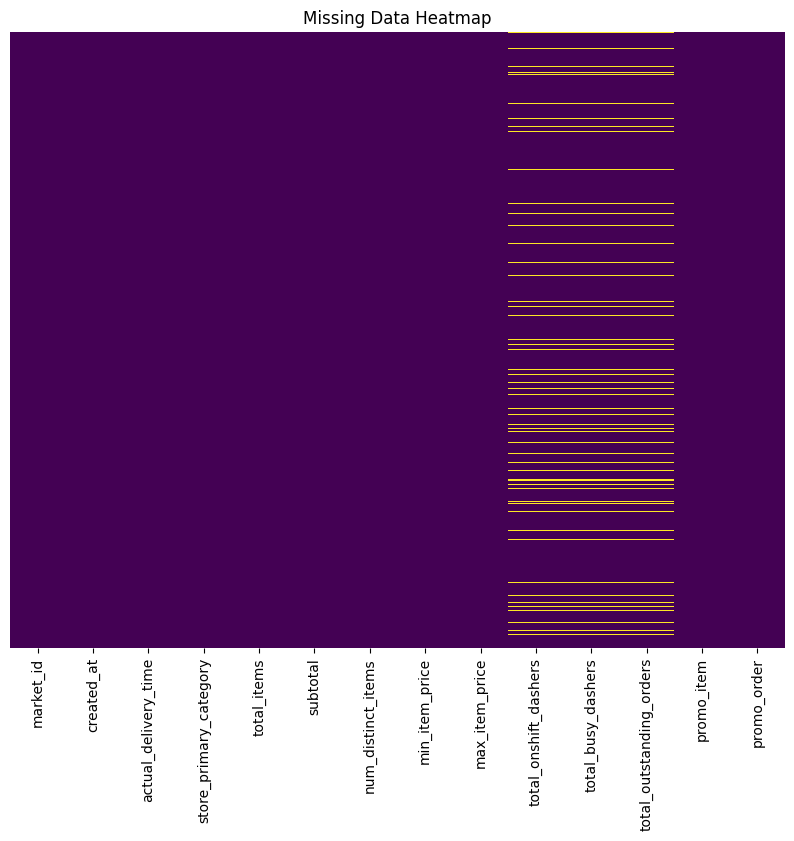

In [6]:
# Create heatmap to see wher missing values are

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


Skewness of total_onshift_dashers: 0.86
Skewness of total_busy_dashers: 0.78
Skewness of total_outstanding_orders: 1.20


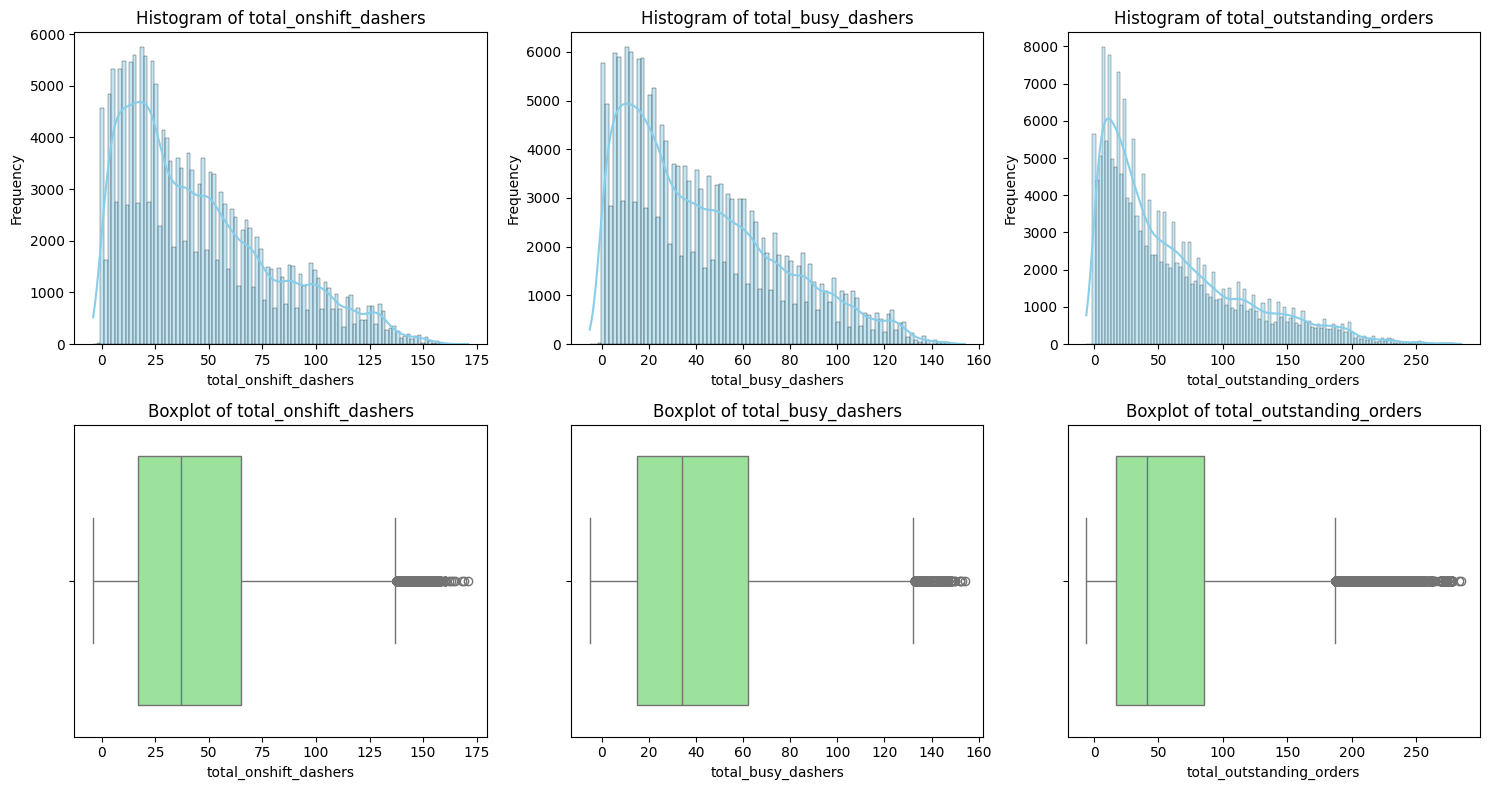

In [7]:
# Check skewness of the data in missing values columns

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# List of columns with missing values
columns_with_missing_values = ['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']

# Create subplots for histograms and boxplots
fig, axes = plt.subplots(2, len(columns_with_missing_values), figsize=(15, 8))

for i, column in enumerate(columns_with_missing_values):
    # Histogram to visualize distribution
    sns.histplot(df[column].dropna(), kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Histogram of {column}')
    axes[0, i].set_xlabel(column)
    axes[0, i].set_ylabel('Frequency')

    # Boxplot to visualize skewness and outliers
    sns.boxplot(x=df[column], ax=axes[1, i], color='lightgreen')
    axes[1, i].set_title(f'Boxplot of {column}')
    axes[1, i].set_xlabel(column)
    
    # Print skewness value
    print(f'Skewness of {column}: {skew(df[column].dropna()):.2f}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWar

Skewness after transformation:
Skewness of total_onshift_dashers_log: nan
Skewness of total_busy_dashers_log: nan
Skewness of total_outstanding_orders_log: nan
   total_onshift_dashers_log  total_busy_dashers_log  \
0                        1.0                     1.0   
1                        1.0                     0.0   
2                        2.0                     1.0   
3                        1.0                     1.0   
4                        0.0                     0.0   

   total_outstanding_orders_log  
0                           1.0  
1                           1.0  
2                           1.0  
3                           1.0  
4                           0.0  


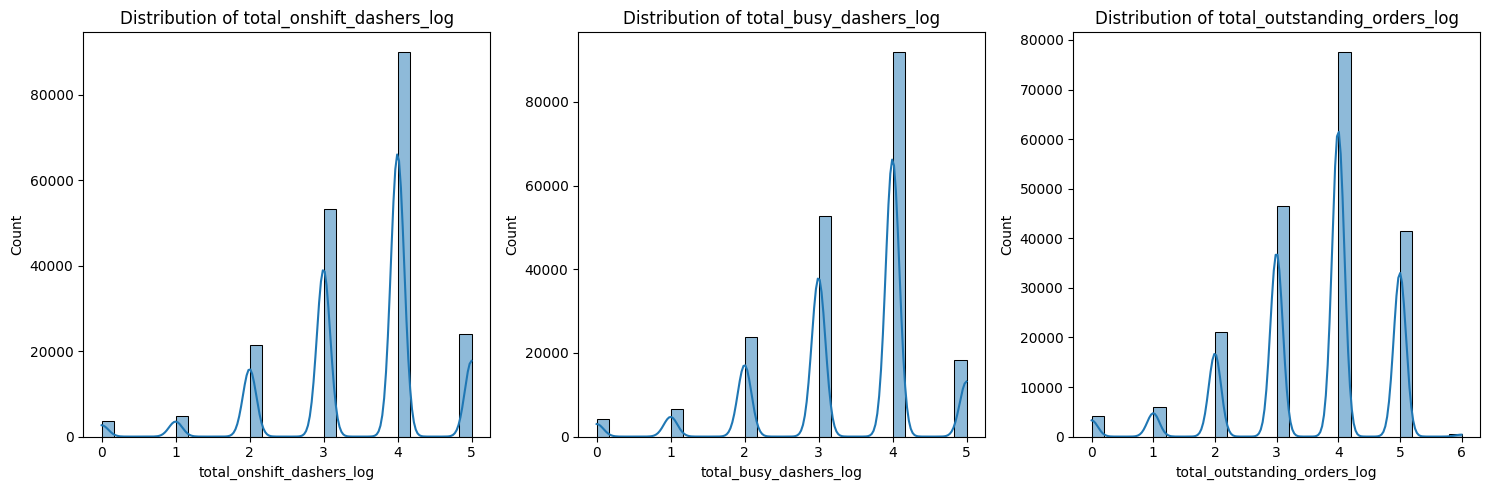

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Handling missing values by imputing with median (rounded to integer)
df['total_onshift_dashers'] = df['total_onshift_dashers'].fillna(int(df['total_onshift_dashers'].median()))
df['total_busy_dashers'] = df['total_busy_dashers'].fillna(int(df['total_busy_dashers'].median()))
df['total_outstanding_orders'] = df['total_outstanding_orders'].fillna(int(df['total_outstanding_orders'].median()))

# Apply log transformation
df['total_onshift_dashers_log'] = np.log1p(df['total_onshift_dashers'])
df['total_busy_dashers_log'] = np.log1p(df['total_busy_dashers'])
df['total_outstanding_orders_log'] = np.log1p(df['total_outstanding_orders'])

# Optional: Reverse-transform fractional values to integers by rounding
df['total_onshift_dashers_log'] = df['total_onshift_dashers_log'].round()
df['total_busy_dashers_log'] = df['total_busy_dashers_log'].round()
df['total_outstanding_orders_log'] = df['total_outstanding_orders_log'].round()

# Verify the changes
print("Skewness after transformation:")
print("Skewness of total_onshift_dashers_log:", df['total_onshift_dashers_log'].skew())
print("Skewness of total_busy_dashers_log:", df['total_busy_dashers_log'].skew())
print("Skewness of total_outstanding_orders_log:", df['total_outstanding_orders_log'].skew())

# Check head of the transformed data
print(df[['total_onshift_dashers_log', 'total_busy_dashers_log', 'total_outstanding_orders_log']].head())

# Visualize the transformed data
plt.figure(figsize=(15, 5))

# Histogram for total_onshift_dashers_log
plt.subplot(1, 3, 1)
sns.histplot(df['total_onshift_dashers_log'], kde=True, bins=30)
plt.title("Distribution of total_onshift_dashers_log")

# Histogram for total_busy_dashers_log
plt.subplot(1, 3, 2)
sns.histplot(df['total_busy_dashers_log'], kde=True, bins=30)
plt.title("Distribution of total_busy_dashers_log")

# Histogram for total_outstanding_orders_log
plt.subplot(1, 3, 3)
sns.histplot(df['total_outstanding_orders_log'], kde=True, bins=30)
plt.title("Distribution of total_outstanding_orders_log")

plt.tight_layout()
plt.show()


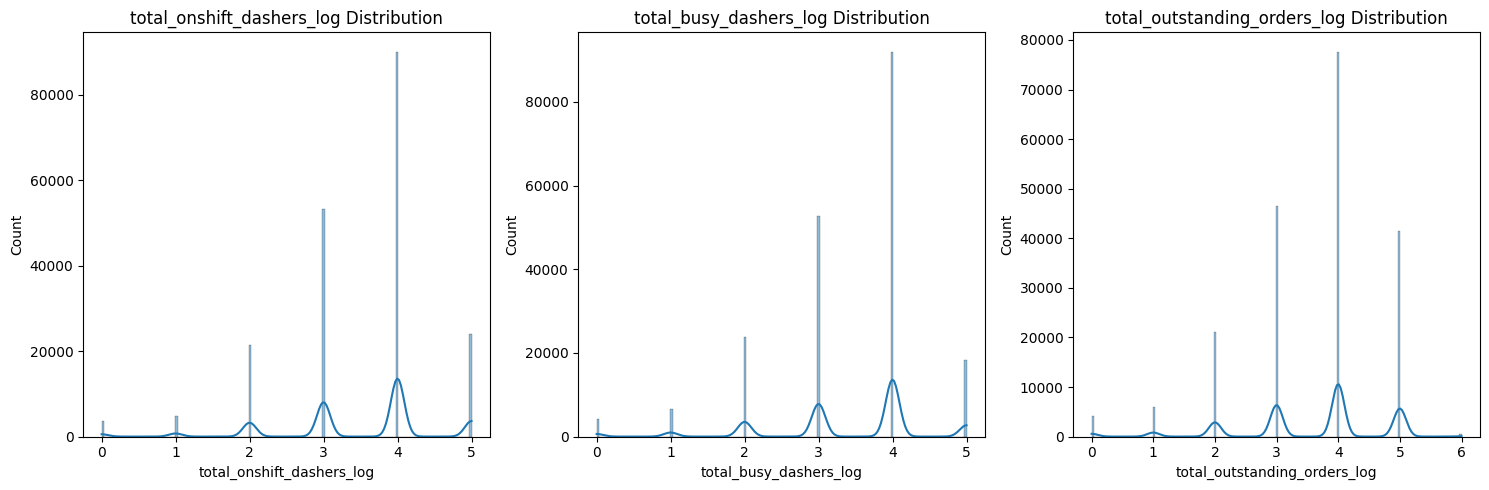

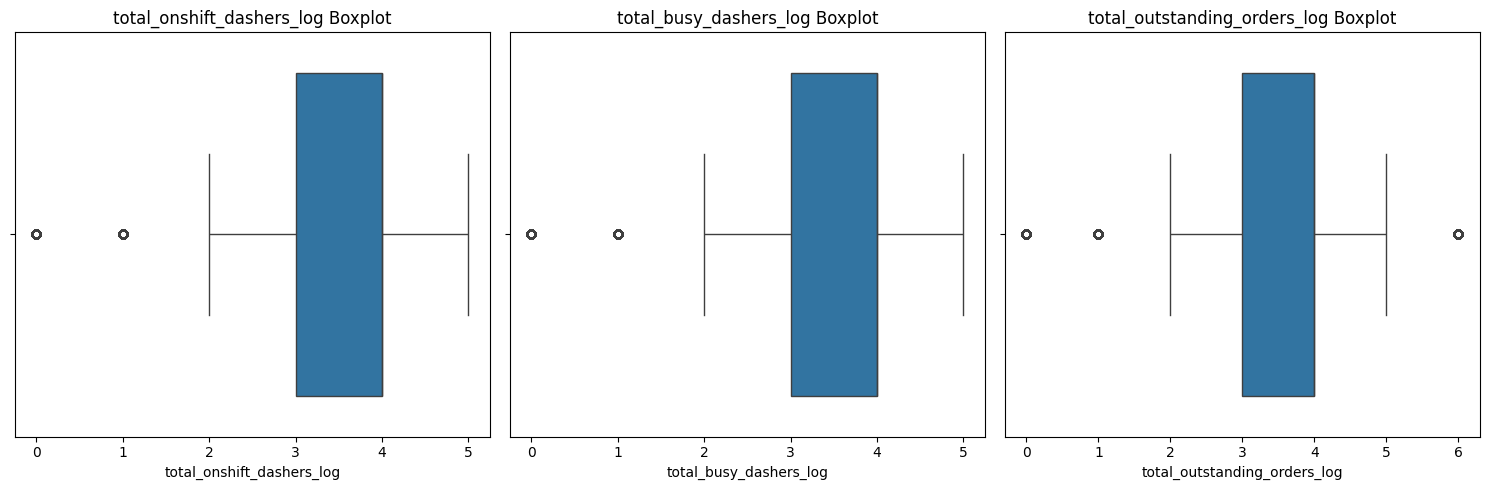

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns after log transformation
log_columns = ['total_onshift_dashers_log', 'total_busy_dashers_log', 'total_outstanding_orders_log']

# Plot histograms to visualize the skewness
plt.figure(figsize=(15, 5))

for i, col in enumerate(log_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

# Box plots to visualize the distribution
plt.figure(figsize=(15, 5))

for i, col in enumerate(log_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()


In [10]:
# Create Busy Ratio column

df['busy_ratio'] = df['total_busy_dashers'] / df['total_onshift_dashers']


In [11]:
# Handle Edge Cases: To ensure robustness

df['busy_ratio'] = df.apply(
    lambda row: row['total_busy_dashers'] / row['total_onshift_dashers']
    if row['total_onshift_dashers'] > 0 else 0, axis=1
)

print(df[['total_onshift_dashers', 'total_busy_dashers', 'busy_ratio']].head())



   total_onshift_dashers  total_busy_dashers  busy_ratio
0                    2.0                 1.0    0.500000
1                    2.0                 0.0    0.000000
2                    4.0                 1.0    0.250000
3                    3.0                 2.0    0.666667
4                    0.0                 0.0    0.000000


In [12]:
print(df.isnull().sum())


market_id                        0
created_at                       0
actual_delivery_time             0
store_primary_category           0
total_items                      0
subtotal                         0
num_distinct_items               0
min_item_price                   0
max_item_price                   0
total_onshift_dashers            0
total_busy_dashers               0
total_outstanding_orders         0
promo_item                       0
promo_order                      0
total_onshift_dashers_log       15
total_busy_dashers_log           8
total_outstanding_orders_log    28
busy_ratio                       0
dtype: int64


In [13]:
print(df.dtypes)


market_id                         int64
created_at                       object
actual_delivery_time             object
store_primary_category           object
total_items                       int64
subtotal                          int64
num_distinct_items                int64
min_item_price                    int64
max_item_price                    int64
total_onshift_dashers           float64
total_busy_dashers              float64
total_outstanding_orders        float64
promo_item                        int64
promo_order                       int64
total_onshift_dashers_log       float64
total_busy_dashers_log          float64
total_outstanding_orders_log    float64
busy_ratio                      float64
dtype: object


In [14]:
# Convert data type 

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


In [15]:
print(df.dtypes)


market_id                                           int64
created_at                      datetime64[ns, UTC-08:00]
actual_delivery_time            datetime64[ns, UTC-08:00]
store_primary_category                             object
total_items                                         int64
subtotal                                            int64
num_distinct_items                                  int64
min_item_price                                      int64
max_item_price                                      int64
total_onshift_dashers                             float64
total_busy_dashers                                float64
total_outstanding_orders                          float64
promo_item                                          int64
promo_order                                         int64
total_onshift_dashers_log                         float64
total_busy_dashers_log                            float64
total_outstanding_orders_log                      float64
busy_ratio    

In [16]:
print(df['busy_ratio'].describe())


count    197420.000000
mean          0.930221
std           0.401859
min          -2.000000
25%           0.833333
50%           0.942529
75%           1.000000
max          31.000000
Name: busy_ratio, dtype: float64


In [17]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,promo_item,promo_order,total_onshift_dashers_log,total_busy_dashers_log,total_outstanding_orders_log,busy_ratio
0,1,2015-01-21 07:22:03-08:00,2015-01-21 08:17:43-08:00,dessert,2,1058,2,219,799,2.0,1.0,1.0,0,0,1.0,1.0,1.0,0.500000
1,3,2015-01-21 07:31:51-08:00,2015-01-21 08:16:34-08:00,cafe,2,690,2,195,255,2.0,0.0,1.0,0,0,1.0,0.0,1.0,0.000000
2,1,2015-01-21 07:39:16-08:00,2015-01-21 07:58:11-08:00,unknown,3,1867,3,449,529,4.0,1.0,1.0,0,0,2.0,1.0,1.0,0.250000
3,1,2015-01-21 07:40:42-08:00,2015-01-21 08:22:37-08:00,cafe,3,955,3,245,345,3.0,2.0,2.0,0,0,1.0,1.0,1.0,0.666667
4,1,2015-01-21 07:41:33-08:00,2015-01-21 08:35:14-08:00,chinese,3,825,1,125,125,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.000000


In [18]:
df['store_primary_category'].unique()

array(['dessert', 'cafe', 'unknown', 'chinese', 'smoothie', 'mexican',
       'fast', 'american', 'sandwich', 'vietnamese', 'vegetarian',
       'breakfast', 'salad', 'sushi', 'german', 'italian', 'burger',
       'seafood', 'catering', 'other', 'mediterranean', 'french',
       'hawaiian', 'greek', 'pizza', 'thai', 'alcohol', 'dim-sum',
       'latin-american', 'soup', 'indian', 'vegan', 'japanese',
       'barbecue', 'caribbean', 'nepalese', 'southern', 'korean',
       'middle-eastern', 'asian', 'cajun', 'peruvian', 'brazilian',
       'turkish', 'filipino', 'pasta', 'british', 'tapas', 'persian',
       'burmese', 'bubble-tea', 'convenience-store', 'malaysian', 'steak',
       'pakistani', 'gluten-free', 'comfort-food', 'russian', 'kosher',
       'ethiopian', 'irish', 'alcohol-plus-food', 'afghan', 'gastropub',
       'singaporean', 'argentine', 'moroccan', 'chocolate', 'cheese',
       'lebanese', 'spanish', 'african', 'indonesian', 'european',
       'belgian'], dtype=object)

In [19]:
import pandas as pd

# Assuming your dataframe is named 'df'
df = pd.get_dummies(df, columns=['store_primary_category'], drop_first=False)

# Convert True/False to 1/0
df = df.astype({col: 'int' for col in df.columns if df[col].dtype == 'bool'})

# Check the new shape after One-Hot Encoding
print(f"New shape after One-Hot Encoding: {df.shape}")


New shape after One-Hot Encoding: (197420, 92)


In [20]:
df.head()

,market_id,created_at,actual_delivery_time,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,...,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_unknown,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
0,1,2015-01-21 07:22:03-08:00,2015-01-21 08:17:43-08:00,2,1058,2,219,799,2.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,3,2015-01-21 07:31:51-08:00,2015-01-21 08:16:34-08:00,2,690,2,195,255,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,2015-01-21 07:39:16-08:00,2015-01-21 07:58:11-08:00,3,1867,3,449,529,4.0,1.0,...,0,0,0,0,0,0,1,0,0,0
3,1,2015-01-21 07:40:42-08:00,2015-01-21 08:22:37-08:00,3,955,3,245,345,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,1,2015-01-21 07:41:33-08:00,2015-01-21 08:35:14-08:00,3,825,1,125,125,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print(df.dtypes)

market_id                                                int64
created_at                           datetime64[ns, UTC-08:00]
actual_delivery_time                 datetime64[ns, UTC-08:00]
total_items                                              int64
subtotal                                                 int64
                                               ...            
store_primary_category_turkish                           int32
store_primary_category_unknown                           int32
store_primary_category_vegan                             int32
store_primary_category_vegetarian                        int32
store_primary_category_vietnamese                        int32
Length: 92, dtype: object


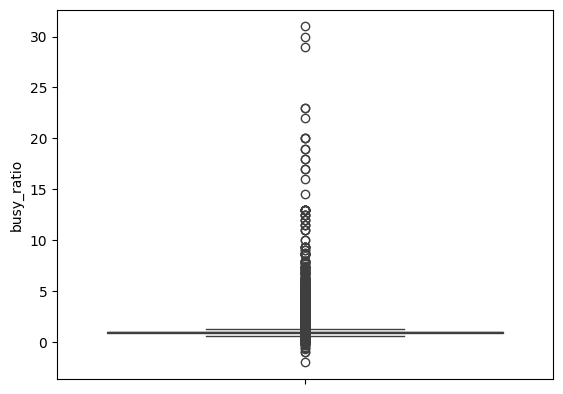

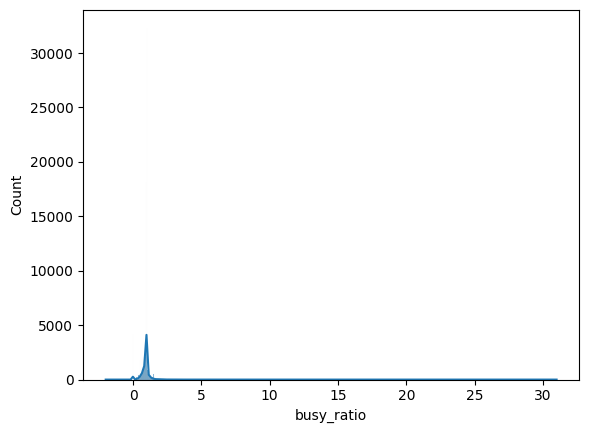

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of busy_ratio
sns.boxplot(df['busy_ratio'])
plt.show()

sns.histplot(df['busy_ratio'], kde=True)
plt.show()


In [23]:
outliers = df[df['busy_ratio'] > 20]  # For example, looking at values > 20
outliers


,market_id,created_at,actual_delivery_time,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,...,store_primary_category_spanish,store_primary_category_steak,store_primary_category_sushi,store_primary_category_tapas,store_primary_category_thai,store_primary_category_turkish,store_primary_category_unknown,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese
34293,2,2015-01-26 08:21:23-08:00,2015-01-26 09:03:49-08:00,3,2290,3,580,1030,1.0,29.0,...,0,0,0,0,0,0,0,0,0,0
34319,4,2015-01-26 08:43:19-08:00,2015-01-26 09:37:07-08:00,2,1585,2,335,1150,1.0,30.0,...,0,0,0,0,0,0,0,0,0,0
34331,4,2015-01-26 08:56:35-08:00,2015-01-26 10:17:53-08:00,5,3255,3,359,959,1.0,22.0,...,0,0,0,0,0,0,0,0,0,0
34350,4,2015-01-26 09:12:26-08:00,2015-01-26 11:04:33-08:00,2,2190,1,800,800,1.0,23.0,...,0,0,0,0,0,0,0,0,0,0
34359,4,2015-01-26 09:16:39-08:00,2015-01-26 09:52:34-08:00,4,6800,4,400,5600,1.0,31.0,...,0,0,0,0,0,0,0,0,0,0
34363,2,2015-01-26 09:17:45-08:00,2015-01-26 11:29:31-08:00,3,1352,3,175,899,1.0,23.0,...,0,0,0,0,0,0,0,0,0,0


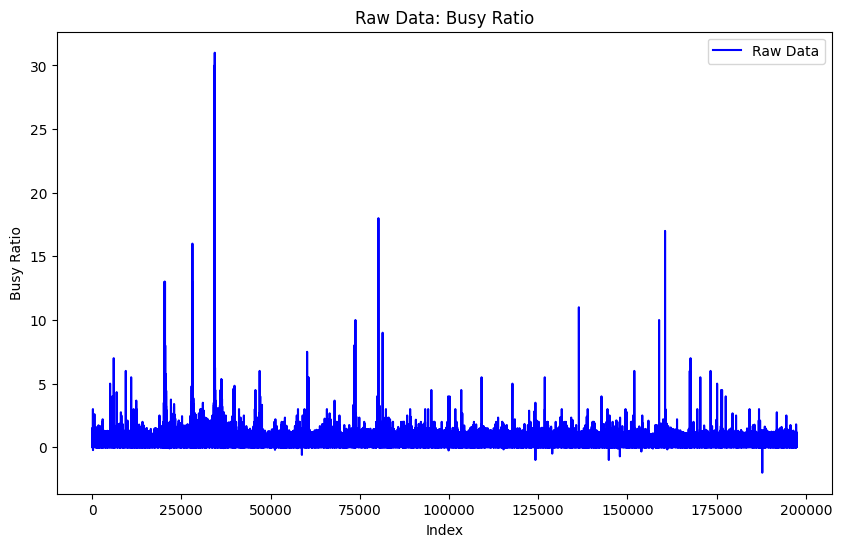

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot raw data to identify trends, outliers, and fluctuations
plt.figure(figsize=(10, 6))
plt.plot(df['busy_ratio'], label='Raw Data', color='blue')
plt.title('Raw Data: Busy Ratio')
plt.xlabel('Index')
plt.ylabel('Busy Ratio')
plt.legend()
plt.show()


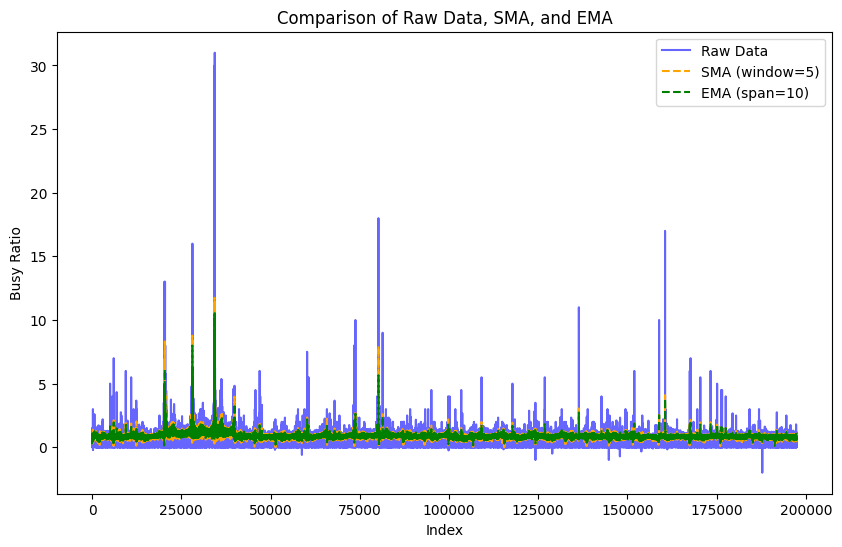

In [25]:
# Calculate Simple Moving Average (SMA) with a window size of 5 (adjust as needed)
window_size = 5
df['SMA'] = df['busy_ratio'].rolling(window=window_size).mean()

# Calculate Exponential Moving Average (EMA) with a span of 10 (adjust as needed)
span_value = 10
df['EMA'] = df['busy_ratio'].ewm(span=span_value, adjust=False).mean()

# Plot raw data, SMA, and EMA to compare
plt.figure(figsize=(10, 6))
plt.plot(df['busy_ratio'], label='Raw Data', color='blue', alpha=0.6)
plt.plot(df['SMA'], label=f'SMA (window={window_size})', color='orange', linestyle='--')
plt.plot(df['EMA'], label=f'EMA (span={span_value})', color='green', linestyle='--')
plt.title('Comparison of Raw Data, SMA, and EMA')
plt.xlabel('Index')
plt.ylabel('Busy Ratio')
plt.legend()
plt.show()


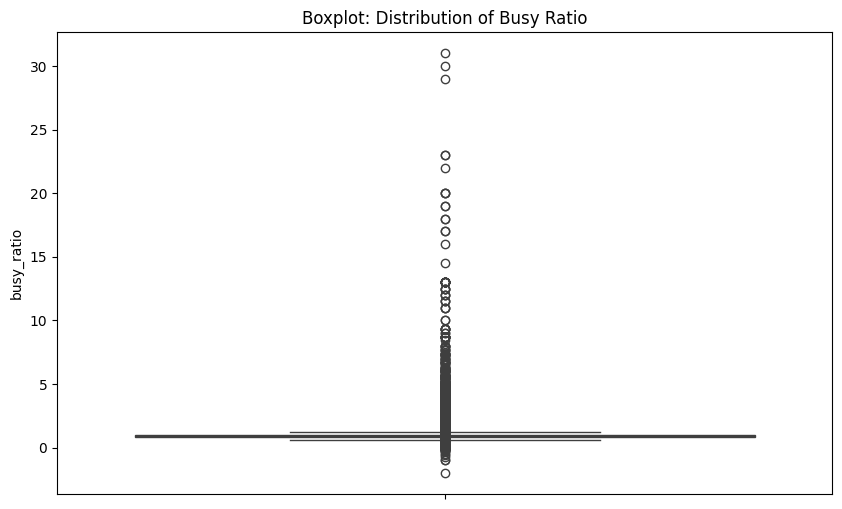

Skewness: 18.28681006125421
Kurtosis: 865.8501842552588


In [26]:
import seaborn as sns

# Visualize the distribution of 'busy_ratio' using a boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='busy_ratio')
plt.title('Boxplot: Distribution of Busy Ratio')
plt.show()

# You can also check for skewness and kurtosis to better understand the distribution
from scipy.stats import skew, kurtosis

skewness = skew(df['busy_ratio'].dropna())
kurt = kurtosis(df['busy_ratio'].dropna())

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


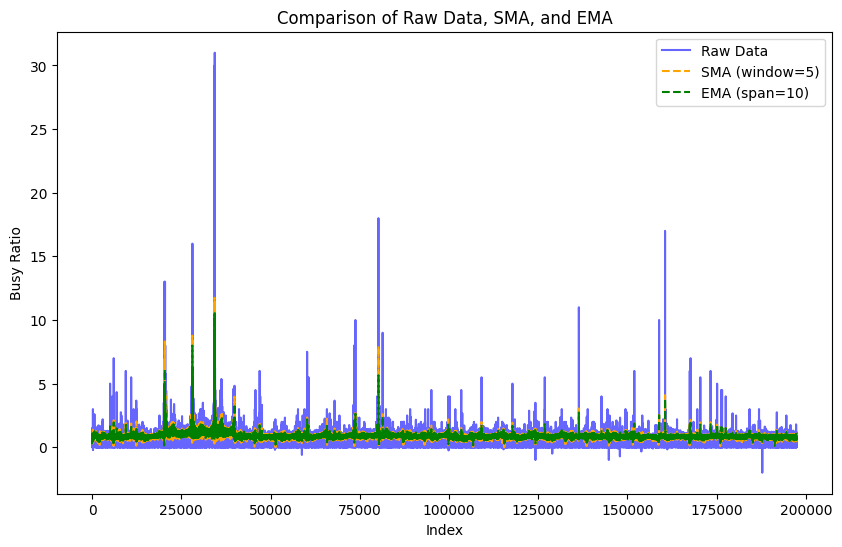

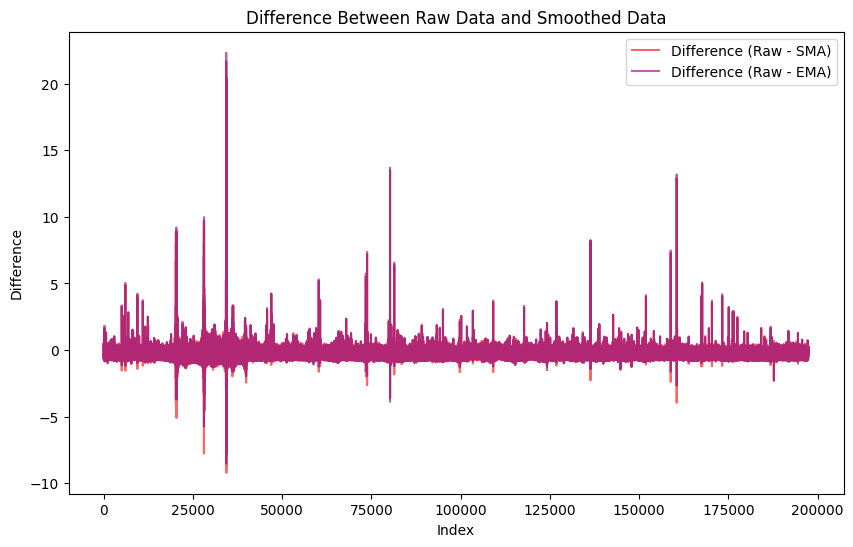

In [27]:
# Visualize the differences before and after smoothing
plt.figure(figsize=(10, 6))
plt.plot(df['busy_ratio'], label='Raw Data', color='blue', alpha=0.6)
plt.plot(df['SMA'], label=f'SMA (window={window_size})', color='orange', linestyle='--')
plt.plot(df['EMA'], label=f'EMA (span={span_value})', color='green', linestyle='--')
plt.title('Comparison of Raw Data, SMA, and EMA')
plt.xlabel('Index')
plt.ylabel('Busy Ratio')
plt.legend()
plt.show()

# Calculate the difference between raw and smoothed data
df['SMA_diff'] = df['busy_ratio'] - df['SMA']
df['EMA_diff'] = df['busy_ratio'] - df['EMA']

# Plot the difference
plt.figure(figsize=(10, 6))
plt.plot(df['SMA_diff'], label='Difference (Raw - SMA)', color='red', alpha=0.6)
plt.plot(df['EMA_diff'], label='Difference (Raw - EMA)', color='purple', alpha=0.6)
plt.title('Difference Between Raw Data and Smoothed Data')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.legend()
plt.show()


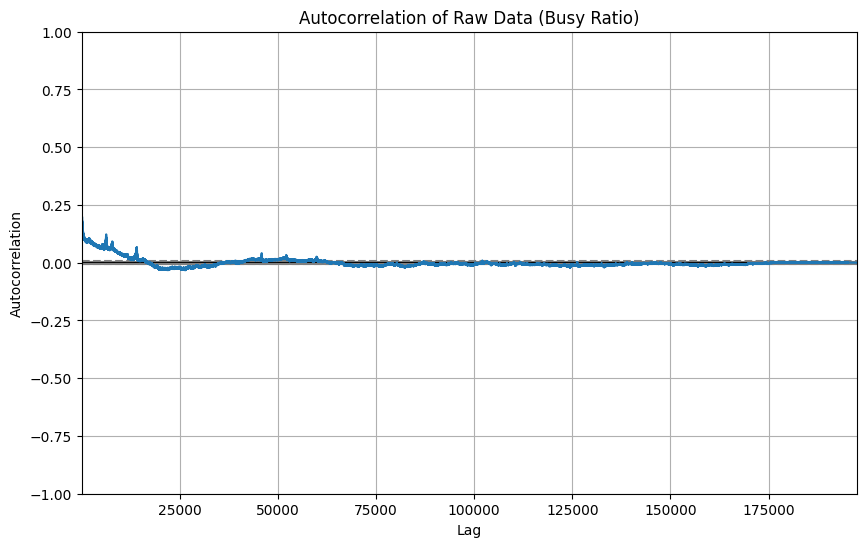

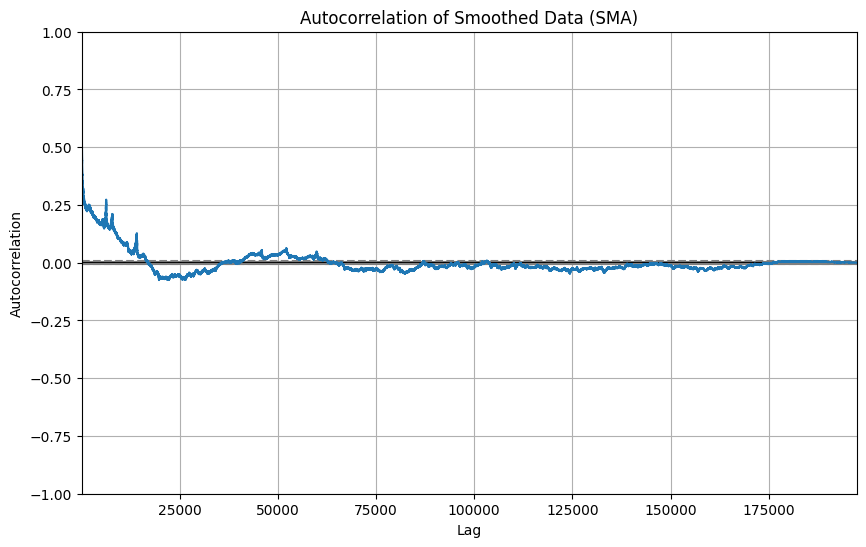

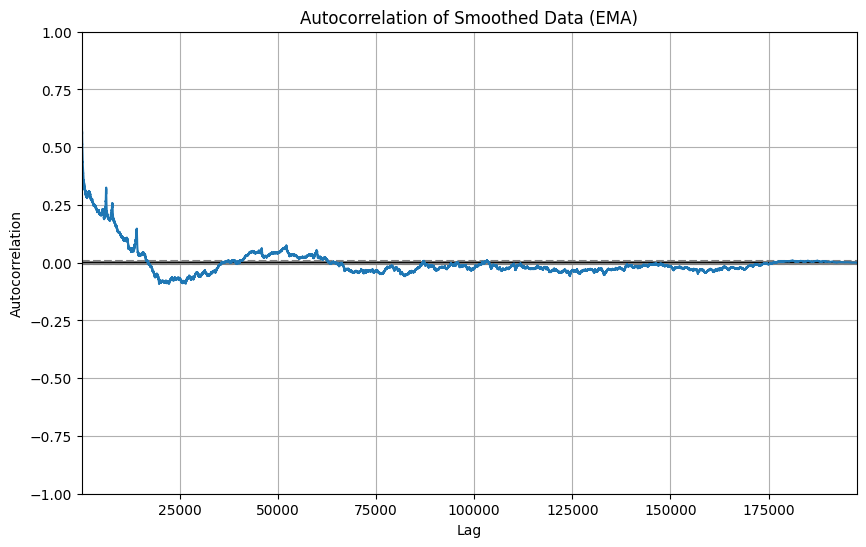

In [28]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation plot for raw data
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['busy_ratio'].dropna())
plt.title('Autocorrelation of Raw Data (Busy Ratio)')
plt.show()

# Autocorrelation plot for smoothed data (SMA)
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['SMA'].dropna())
plt.title('Autocorrelation of Smoothed Data (SMA)')
plt.show()

# Autocorrelation plot for smoothed data (EMA)
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['EMA'].dropna())
plt.title('Autocorrelation of Smoothed Data (EMA)')
plt.show()


In [29]:
df.head()

,market_id,created_at,actual_delivery_time,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,...,store_primary_category_thai,store_primary_category_turkish,store_primary_category_unknown,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,SMA,EMA,SMA_diff,EMA_diff
0,1,2015-01-21 07:22:03-08:00,2015-01-21 08:17:43-08:00,2,1058,2,219,799,2.0,1.0,...,0,0,0,0,0,0,NaN,0.500000,NaN,0.000000
1,3,2015-01-21 07:31:51-08:00,2015-01-21 08:16:34-08:00,2,690,2,195,255,2.0,0.0,...,0,0,0,0,0,0,NaN,0.409091,NaN,-0.409091
2,1,2015-01-21 07:39:16-08:00,2015-01-21 07:58:11-08:00,3,1867,3,449,529,4.0,1.0,...,0,0,1,0,0,0,NaN,0.380165,NaN,-0.130165
3,1,2015-01-21 07:40:42-08:00,2015-01-21 08:22:37-08:00,3,955,3,245,345,3.0,2.0,...,0,0,0,0,0,0,NaN,0.432256,NaN,0.234410
4,1,2015-01-21 07:41:33-08:00,2015-01-21 08:35:14-08:00,3,825,1,125,125,0.0,0.0,...,0,0,0,0,0,0,0.283333,0.353664,-0.283333,-0.353664


In [30]:
df.isnull().sum()

market_id                            0
created_at                           0
actual_delivery_time                 0
total_items                          0
subtotal                             0
                                    ..
store_primary_category_vietnamese    0
SMA                                  4
EMA                                  0
SMA_diff                             4
EMA_diff                             0
Length: 96, dtype: int64

In [31]:
df['SMA'] = df['SMA'].fillna(method='bfill')  # Backward fill SMA
df['SMA_diff'] = df['SMA_diff'].fillna(method='bfill')  # Backward fill SMA_diff


C:\Users\tusha\AppData\Local\Temp\ipykernel_13772\1573327934.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SMA'] = df['SMA'].fillna(method='bfill')  # Backward fill SMA
C:\Users\tusha\AppData\Local\Temp\ipykernel_13772\1573327934.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SMA_diff'] = df['SMA_diff'].fillna(method='bfill')  # Backward fill SMA_diff


In [32]:
df

,market_id,created_at,actual_delivery_time,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,...,store_primary_category_thai,store_primary_category_turkish,store_primary_category_unknown,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,SMA,EMA,SMA_diff,EMA_diff
0,1,2015-01-21 07:22:03-08:00,2015-01-21 08:17:43-08:00,2,1058,2,219,799,2.0,1.0,...,0,0,0,0,0,0,0.283333,0.500000,-0.283333,0.000000
1,3,2015-01-21 07:31:51-08:00,2015-01-21 08:16:34-08:00,2,690,2,195,255,2.0,0.0,...,0,0,0,0,0,0,0.283333,0.409091,-0.283333,-0.409091
2,1,2015-01-21 07:39:16-08:00,2015-01-21 07:58:11-08:00,3,1867,3,449,529,4.0,1.0,...,0,0,1,0,0,0,0.283333,0.380165,-0.283333,-0.130165
3,1,2015-01-21 07:40:42-08:00,2015-01-21 08:22:37-08:00,3,955,3,245,345,3.0,2.0,...,0,0,0,0,0,0,0.283333,0.432256,-0.283333,0.234410
4,1,2015-01-21 07:41:33-08:00,2015-01-21 08:35:14-08:00,3,825,1,125,125,0.0,0.0,...,0,0,0,0,0,0,0.283333,0.353664,-0.283333,-0.353664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197415,6,2015-02-17 21:57:51-08:00,2015-02-17 22:38:38-08:00,3,3600,3,800,1500,37.0,34.0,...,0,0,0,0,0,0,0.933872,0.854544,-0.014953,0.064375
197416,2,2015-02-17 21:58:07-08:00,2015-02-17 22:16:03-08:00,2,1800,2,825,975,13.0,9.0,...,0,0,1,0,0,0,0.872333,0.825046,-0.180026,-0.132739
197417,6,2015-02-17 21:59:01-08:00,2015-02-17 22:33:53-08:00,3,740,3,128,357,37.0,34.0,...,0,0,0,0,0,0,0.881117,0.842114,0.037802,0.076805
197418,6,2015-02-17 21:59:23-08:00,2015-02-17 22:27:25-08:00,1,1400,1,1200,1200,37.0,34.0,...,1,0,0,0,0,0,0.881117,0.856079,0.037802,0.062840


In [33]:
df.isnull().sum()

market_id                            0
created_at                           0
actual_delivery_time                 0
total_items                          0
subtotal                             0
                                    ..
store_primary_category_vietnamese    0
SMA                                  0
EMA                                  0
SMA_diff                             0
EMA_diff                             0
Length: 96, dtype: int64

In [34]:
import pandas as pd

corr_matrix = df[[
    'total_onshift_dashers', 
    'total_onshift_dashers_log', 
    'total_busy_dashers', 
    'total_busy_dashers_log', 
    'total_outstanding_orders', 
    'total_outstanding_orders_log'
]].corr()

corr_matrix


,total_onshift_dashers,total_onshift_dashers_log,total_busy_dashers,total_busy_dashers_log,total_outstanding_orders,total_outstanding_orders_log
total_onshift_dashers,1.000000,0.831978,0.944029,0.782306,0.936139,0.813109
total_onshift_dashers_log,0.831978,1.000000,0.804129,0.925491,0.753932,0.899054
total_busy_dashers,0.944029,0.804129,1.000000,0.823861,0.933080,0.818031
total_busy_dashers_log,0.782306,0.925491,0.823861,1.000000,0.739342,0.909963
total_outstanding_orders,0.936139,0.753932,0.933080,0.739342,1.000000,0.798619
total_outstanding_orders_log,0.813109,0.899054,0.818031,0.909963,0.798619,1.000000


In [35]:
df = df.drop(columns=[
    'total_onshift_dashers', 
    'total_busy_dashers', 
    'total_outstanding_orders'
])


In [36]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'promo_item', 'promo_order', 'total_onshift_dashers_log',
       'total_busy_dashers_log', 'total_outstanding_orders_log', 'busy_ratio',
       'store_primary_category_afghan', 'store_primary_category_african',
       'store_primary_category_alcohol',
       'store_primary_category_alcohol-plus-food',
       'store_primary_category_american', 'store_primary_category_argentine',
       'store_primary_category_asian', 'store_primary_category_barbecue',
       'store_primary_category_belgian', 'store_primary_category_brazilian',
       'store_primary_category_breakfast', 'store_primary_category_british',
       'store_primary_category_bubble-tea', 'store_primary_category_burger',
       'store_primary_category_burmese', 'store_primary_category_cafe',
       'store_primary_category_cajun', 'store_primary_category_caribbean',
       'st

In [37]:
# Calculate average busy_ratio for each market_id

market_busy_ratio = df.groupby('market_id')['busy_ratio'].mean()
print(market_busy_ratio)


market_id
1     0.908767
2     0.967897
3     0.854266
4     0.971068
5     0.859578
6     0.919489
99    0.923705
Name: busy_ratio, dtype: float64


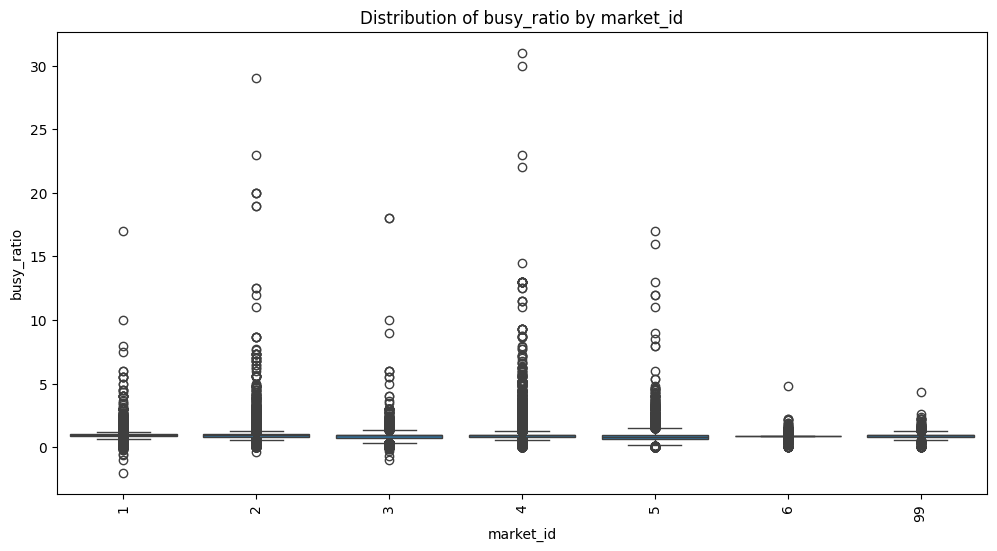

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of busy_ratio by market_id
plt.figure(figsize=(12, 6))
sns.boxplot(x='market_id', y='busy_ratio', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many unique market_ids
plt.title('Distribution of busy_ratio by market_id')
plt.show()


In [39]:
from scipy import stats

# Perform ANOVA test to check if busy_ratio means differ by market_id
anova_result = stats.f_oneway(*[df['busy_ratio'][df['market_id'] == market] for market in df['market_id'].unique()])
print("ANOVA result:", anova_result)


ANOVA result: F_onewayResult(statistic=419.10884048226694, pvalue=0.0)


In [40]:
from sklearn.feature_selection import mutual_info_regression

# Encode market_id if necessary (e.g., label encoding)
df['market_id_encoded'] = df['market_id'].astype('category').cat.codes

# Compute mutual information
mi = mutual_info_regression(df[['market_id_encoded']], df['busy_ratio'])
print("Mutual Information for market_id:", mi)


Mutual Information for market_id: [0.47549805]


In [41]:
# Mapping of Original market_id to Encoded Values:
# 0 → market_id 1
# 2 → market_id 2
# 1 → market_id 3
# 3 → market_id 4
# 6 → market_id 99
# 5 → market_id 5
# 4 → market_id 6

In [42]:
# Encode market_id

from sklearn.preprocessing import OneHotEncoder

# One-hot encode market_id
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output instead of sparse
market_id_encoded = one_hot_encoder.fit_transform(df[['market_id']])


In [43]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'promo_item', 'promo_order', 'total_onshift_dashers_log',
       'total_busy_dashers_log', 'total_outstanding_orders_log', 'busy_ratio',
       'store_primary_category_afghan', 'store_primary_category_african',
       'store_primary_category_alcohol',
       'store_primary_category_alcohol-plus-food',
       'store_primary_category_american', 'store_primary_category_argentine',
       'store_primary_category_asian', 'store_primary_category_barbecue',
       'store_primary_category_belgian', 'store_primary_category_brazilian',
       'store_primary_category_breakfast', 'store_primary_category_british',
       'store_primary_category_bubble-tea', 'store_primary_category_burger',
       'store_primary_category_burmese', 'store_primary_category_cafe',
       'store_primary_category_cajun', 'store_primary_category_caribbean',
       'st

In [44]:
df.head()

,market_id,created_at,actual_delivery_time,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,promo_item,promo_order,...,store_primary_category_turkish,store_primary_category_unknown,store_primary_category_vegan,store_primary_category_vegetarian,store_primary_category_vietnamese,SMA,EMA,SMA_diff,EMA_diff,market_id_encoded
0,1,2015-01-21 07:22:03-08:00,2015-01-21 08:17:43-08:00,2,1058,2,219,799,0,0,...,0,0,0,0,0,0.283333,0.500000,-0.283333,0.000000,0
1,3,2015-01-21 07:31:51-08:00,2015-01-21 08:16:34-08:00,2,690,2,195,255,0,0,...,0,0,0,0,0,0.283333,0.409091,-0.283333,-0.409091,2
2,1,2015-01-21 07:39:16-08:00,2015-01-21 07:58:11-08:00,3,1867,3,449,529,0,0,...,0,1,0,0,0,0.283333,0.380165,-0.283333,-0.130165,0
3,1,2015-01-21 07:40:42-08:00,2015-01-21 08:22:37-08:00,3,955,3,245,345,0,0,...,0,0,0,0,0,0.283333,0.432256,-0.283333,0.234410,0
4,1,2015-01-21 07:41:33-08:00,2015-01-21 08:35:14-08:00,3,825,1,125,125,0,0,...,0,0,0,0,0,0.283333,0.353664,-0.283333,-0.353664,0


In [45]:
df['market_id_encoded'].unique()

array([0, 2, 1, 3, 6, 5, 4], dtype=int8)

In [46]:
# Drop the original market_id column

df = df.drop(columns=['market_id'])


In [48]:
print(df.dtypes)


created_at              datetime64[ns, UTC-08:00]
actual_delivery_time    datetime64[ns, UTC-08:00]
total_items                                 int64
subtotal                                    int64
num_distinct_items                          int64
                                  ...            
SMA                                       float64
EMA                                       float64
SMA_diff                                  float64
EMA_diff                                  float64
market_id_encoded                            int8
Length: 93, dtype: object


In [49]:
# Convert datetime columns to numeric by calculating the time difference
df['delivery_time_diff'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds()

# Drop the original datetime columns
df = df.drop(columns=['created_at', 'actual_delivery_time'])


In [50]:
print(df.dtypes)


total_items             int64
subtotal                int64
num_distinct_items      int64
min_item_price          int64
max_item_price          int64
                       ...   
EMA                   float64
SMA_diff              float64
EMA_diff              float64
market_id_encoded        int8
delivery_time_diff    float64
Length: 92, dtype: object


In [52]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with zero or an appropriate value
df = df.fillna(0)


total_items           0
subtotal              0
num_distinct_items    0
min_item_price        0
max_item_price        0
                     ..
EMA                   0
SMA_diff              0
EMA_diff              0
market_id_encoded     0
delivery_time_diff    0
Length: 92, dtype: int64


In [53]:
print(df.describe())  # Summarize data statistics


C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\tusha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


         total_items       subtotal  num_distinct_items  min_item_price  \
count  197420.000000  197420.000000       197420.000000   197420.000000   
mean        3.196378    2682.331380            2.670788      686.223863   
std         2.666554    1823.109519            1.630261      522.036289   
min         1.000000       0.000000            1.000000        0.000000   
25%         2.000000    1400.000000            1.000000      299.000000   
50%         3.000000    2200.000000            2.000000      595.000000   
75%         4.000000    3395.000000            3.000000      949.000000   
max       411.000000   27100.000000           20.000000    14700.000000   

       max_item_price     promo_item    promo_order  \
count   197420.000000  197420.000000  197420.000000   
mean      1159.588238       0.012861       0.000907   
std        558.416791       0.112675       0.030098   
min          0.000000       0.000000       0.000000   
25%        800.000000       0.000000       0.0000

In [54]:
# Save the PrepData

df.to_csv('preprocessed_doordash.csv', index=False)